In [2]:
import p3

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def load_scores(filename):
	"""Load scores from a csv file"""
	scores = np.loadtxt(filename, delimiter=',')
	scores = scores[1:]
	return scores

def smooth(scores, window_size=30):
	"""Smooth scores by averaging over a window"""
	smoothed = np.zeros(len(scores))
	for i in range(len(scores)):
		smoothed[i] = np.mean(scores[max(0, i - window_size):i + 1])
	return smoothed

def plot_scores(scores_q, scores_s, title=None):
	plt.plot(scores_q)
	plt.plot(scores_s, color='red')
	plt.legend(['Q-learning', 'Sarsa'])
	# set y axis to -200 to 0
	#plt.ylim(-200, 0)
	plt.xlabel('Episode')
	plt.ylabel(f'Score ({title})' if title else 'Score')

In [51]:
import importlib
importlib.reload(p3)

<module 'p3' from '/mnt/c/Users/Christoph/Documents/repos/hpi-sam/ProbabilisticModels_WiSe20_23/Groups/benito-christoph-ivan/p3/p3.py'>

In [52]:
p3.main(['qlearning', '-q'], 'scores_qlearning.csv')
p3.main(['sarsa', '-q'], 'scores_sarsa.csv')

Score: -56.8: 100%|██████████| 2000/2000 [00:02<00:00, 865.69it/s] 


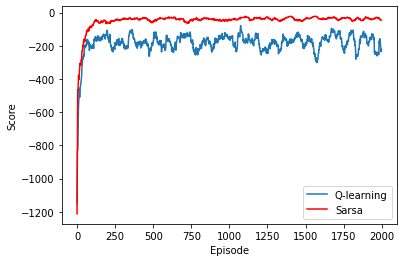

In [53]:
scores_q = smooth(load_scores('scores_qlearning.csv'))
scores_s = smooth(load_scores('scores_sarsa.csv'))
plot_scores(scores_q[:2000], scores_s[:2000])

# Transfer Learning

In [4]:
p3.main(['qlearning', '-q', '--new-obstacle', '--shift'], 'scores_qlearning.csv')
p3.main(['sarsa', '-q', '--new-obstacle', '--shift'], 'scores_sarsa.csv')

Score: -12.0: 100%|██████████| 2000/2000 [00:03<00:00, 653.11it/s] 


😈 New obstacle! 😈


Score: -16.3: 100%|██████████| 2000/2000 [00:02<00:00, 744.95it/s]


😈 Shift the goal! 😈


Score: -14.2: 100%|██████████| 2000/2000 [00:03<00:00, 588.19it/s]


😈 New obstacle! 😈


Score: -16.2: 100%|██████████| 2000/2000 [00:02<00:00, 910.01it/s] 


😈 Shift the goal! 😈


Score: -13.0: 100%|██████████| 2000/2000 [00:01<00:00, 1497.67it/s]


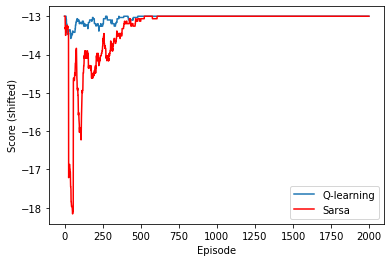

In [7]:
scores_qs = smooth(load_scores('scores_qlearning.csv_shifted'))
scores_ss = smooth(load_scores('scores_sarsa.csv_shifted'))
plot_scores(scores_qs, scores_ss, 'shifted')

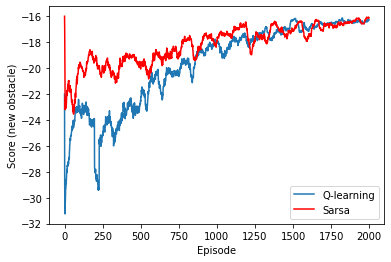

In [8]:
scores_qn = smooth(load_scores('scores_qlearning.csv_newobstacle'))
scores_sn = smooth(load_scores('scores_sarsa.csv_newobstacle'))
plot_scores(scores_qn, scores_sn, 'new obstacle')